In [409]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

DATA PROCESSING

In [410]:
cars=pd.read_csv(r"C:\Users\mruna\Predictive models\CarPrices\CarPrice_Assignment.csv")
cars.head(3)
#print(cars.info()) ---> no null values

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [411]:
cars['carvolume'] = cars['carlength'] * cars['carwidth'] * cars['carheight']
cars['carvolume']

0      528019.904
1      528019.904
2      587592.640
3      634816.956
4      636734.832
          ...    
200    721961.760
201    720913.920
202    721961.760
203    721961.760
204    721961.760
Name: carvolume, Length: 205, dtype: float64

In [412]:
z_scores = (cars['price'] - cars['price'].mean()) / cars['price'].std()
cars = cars[np.abs(z_scores) < 3]

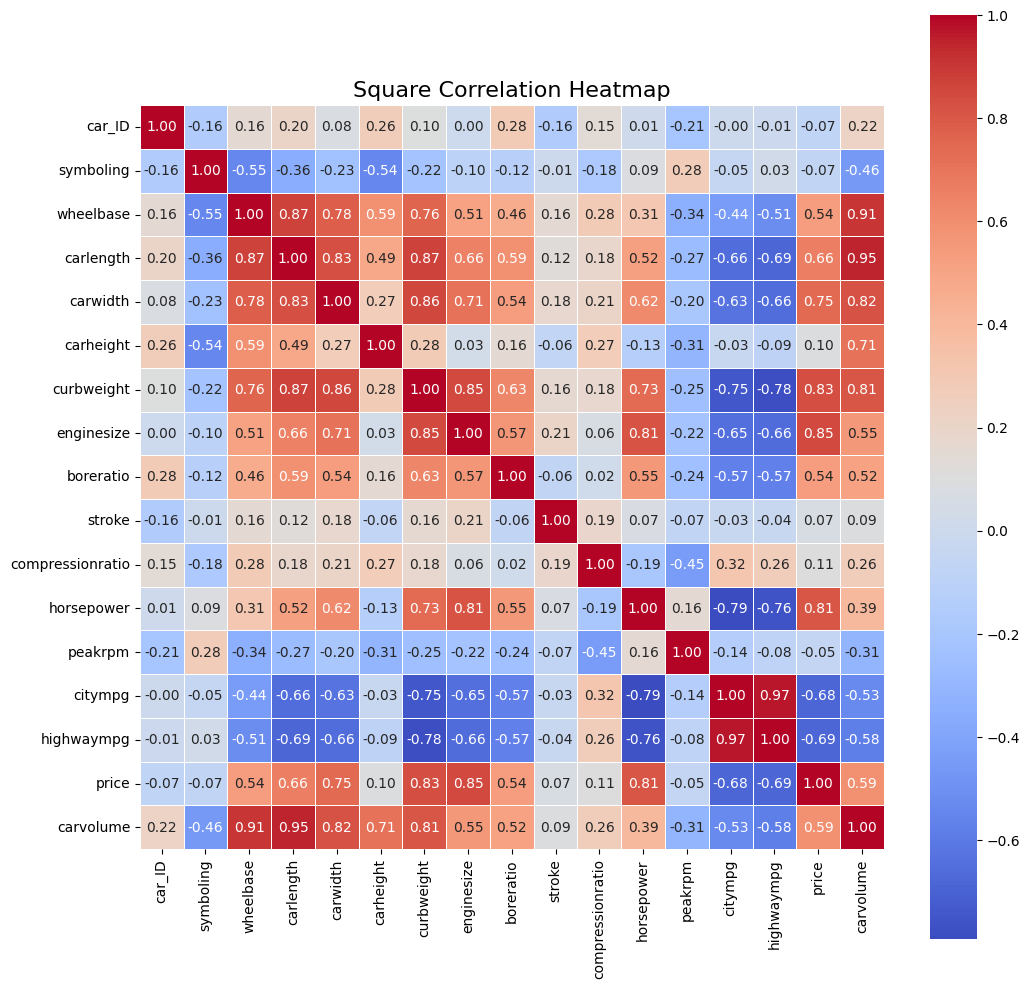

In [413]:
numeric_cars = cars.select_dtypes(include=['float64', 'int64'])
corr = numeric_cars.corr()

plt.figure(figsize=(12,12))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Square Correlation Heatmap", fontsize=16)
plt.show()


In [414]:
columns_to_plot = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'highwaympg']
#COlUMNS WITH THE HIGHEST RELATION WITH PRICE

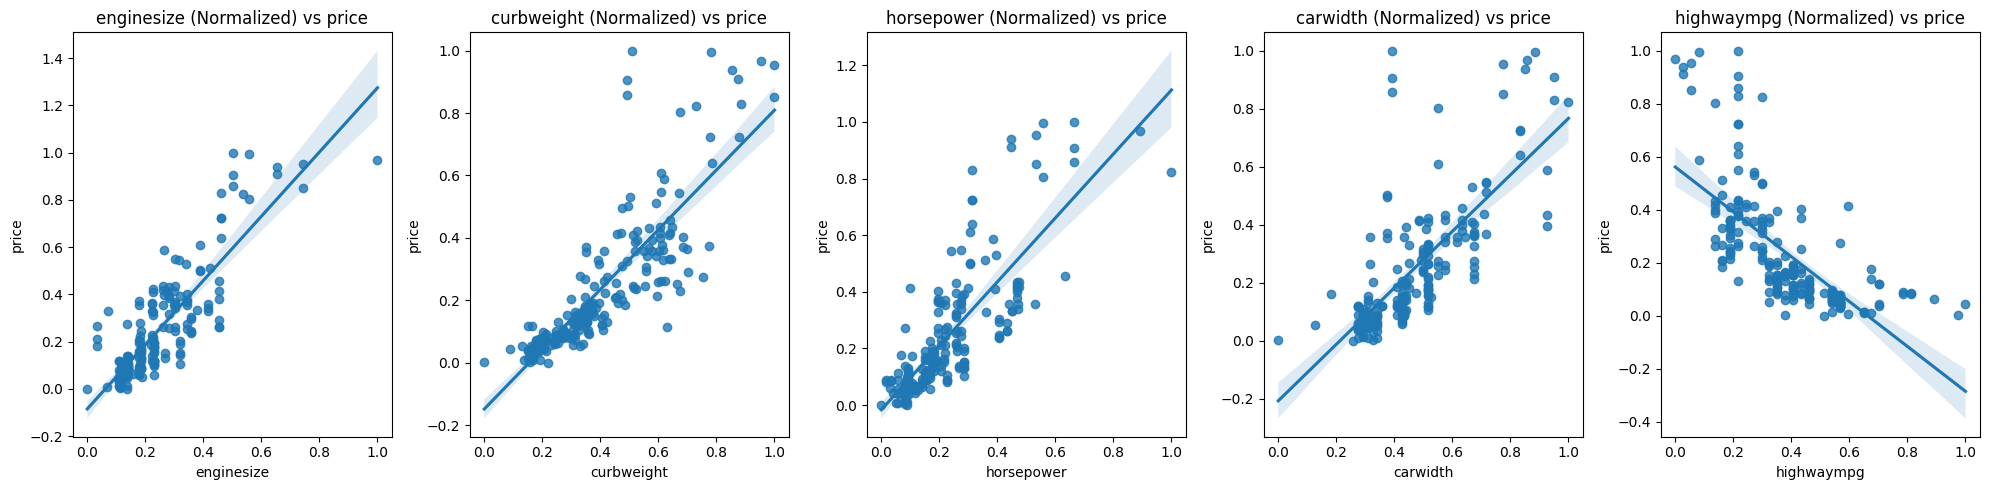

In [415]:
#Checking 1st Assumption-LINEARITY
target = 'price'
columns_to_plot = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'highwaympg']

cars_scaled = cars.copy()

# Scale selected feature columns using NumPy
for col in columns_to_plot:
    arr = cars[col].values  # numpy array
    cars_scaled[col] = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

# Scale target ONLY for visualization
arr_t = cars[target].values
cars_scaled[target] = (arr_t - np.min(arr_t)) / (np.max(arr_t) - np.min(arr_t))

# Plot after scaling
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(20, 5))

for i, col in enumerate(columns_to_plot):
    sns.regplot(x=cars_scaled[col], y=cars_scaled[target], ax=axes[i])
    axes[i].set_title(f'{col} (Normalized) vs {target}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)

plt.tight_layout()
plt.show()

Analysis
enginesize, curbweight, horsepower,carwidth, and -features with the highest correlation 

In [416]:
cols = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'highwaympg']

X = np.column_stack([cars[col].astype(float) for col in cols])
Y = np.array(cars['price'].astype(float)).reshape(-1,1)
print(X.shape)
Y.shape

(202, 5)


(202, 1)

In [417]:
np.random.seed(42)
m = X.shape[0]
indices = np.random.permutation(m)
split_idx = int(m * 0.7)  # 70% train

train_idx = indices[:split_idx]
test_idx  = indices[split_idx:]

X_train = X[train_idx]
Y_train = Y[train_idx].reshape(-1,1)
X_test  = X[test_idx]
Y_test  = Y[test_idx].reshape(-1,1)

In [418]:
mean_X_train = X_train.mean(axis=0)
std_X_train  = X_train.std(axis=0)
X_train_scaled = (X_train - mean_X_train) / std_X_train
X_test_scaled  = (X_test  - mean_X_train) / std_X_train

mean_Y_train = Y_train.mean()
std_Y_train  = Y_train.std()
Y_train_scaled = (Y_train - mean_Y_train) / std_Y_train
Y_test_scaled  = (Y_test - mean_Y_train) / std_Y_train

In [419]:
def CostFunction(X,Y,w,b):
    m = len(Y)
    f = np.dot(X,w) + b
    error = f - Y
    cost = (1/(2*m)) * np.sum(error**2)
    return cost

In [420]:
# Initialize parameters
w = np.zeros((X_train_scaled.shape[1], 1))
b = 0.0

# Lists to store cost and epoch number
costs = []
epochs = []

m_train = X_train_scaled.shape[0]

for i in range(1, iterations + 1):
    # Forward pass: predictions
    f = np.dot(X_train_scaled, w) + b
    error = f - Y_train_scaled

    # Gradients
    d_w = np.dot(X_train_scaled.T, error) / m_train
    d_b = np.sum(error) / m_train

    # Parameter update
    w -= learning_rate * d_w
    b -= learning_rate * d_b

    # Compute and store cost every 100 iterations
    if i % 100 == 0:
        cost = np.sum(error ** 2) / (2 * m_train)
        costs.append(cost)
        epochs.append(i)
        print(f"Iteration {i}: Cost = {cost:.6f}")

Iteration 100: Cost = 0.104120
Iteration 200: Cost = 0.099275
Iteration 300: Cost = 0.096830
Iteration 400: Cost = 0.095553
Iteration 500: Cost = 0.094878
Iteration 600: Cost = 0.094515
Iteration 700: Cost = 0.094315
Iteration 800: Cost = 0.094200
Iteration 900: Cost = 0.094131
Iteration 1000: Cost = 0.094086
Iteration 1100: Cost = 0.094055
Iteration 1200: Cost = 0.094032
Iteration 1300: Cost = 0.094014
Iteration 1400: Cost = 0.093999
Iteration 1500: Cost = 0.093987
Iteration 1600: Cost = 0.093977
Iteration 1700: Cost = 0.093968
Iteration 1800: Cost = 0.093960
Iteration 1900: Cost = 0.093953
Iteration 2000: Cost = 0.093947
Iteration 2100: Cost = 0.093942
Iteration 2200: Cost = 0.093937
Iteration 2300: Cost = 0.093933
Iteration 2400: Cost = 0.093930
Iteration 2500: Cost = 0.093927
Iteration 2600: Cost = 0.093924
Iteration 2700: Cost = 0.093921
Iteration 2800: Cost = 0.093919
Iteration 2900: Cost = 0.093918
Iteration 3000: Cost = 0.093916
Iteration 3100: Cost = 0.093914
Iteration 3200: C

In [421]:
Y_test_pred_scaled = np.dot(X_test_scaled, w) + b

# MSE & RMSE
mse_test  = np.mean((Y_test_scaled - Y_test_pred_scaled)**2)
rmse_test = np.sqrt(mse_test)

# R²
ss_res = np.sum((Y_test_scaled - Y_test_pred_scaled)**2)
ss_tot = np.sum((Y_test_scaled - np.mean(Y_test_scaled))**2)
r2_test = 1 - (ss_res / ss_tot)

print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
print("Test R²:", r2_test)

Test MSE: 0.1887949550843247
Test RMSE: 0.43450541433257733
Test R²: 0.7566628086459699


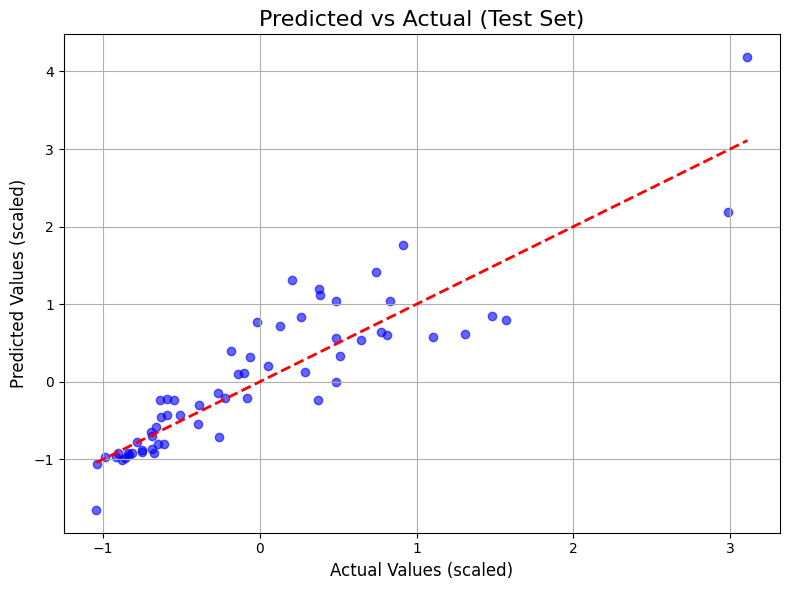

In [422]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test_scaled, Y_test_pred_scaled, alpha=0.6, color='blue')
plt.plot([Y_test_scaled.min(), Y_test_scaled.max()],
         [Y_test_scaled.min(), Y_test_scaled.max()],
         'r--', linewidth=2)
plt.xlabel("Actual Values (scaled)", fontsize=12)
plt.ylabel("Predicted Values (scaled)", fontsize=12)
plt.title("Predicted vs Actual (Test Set)", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

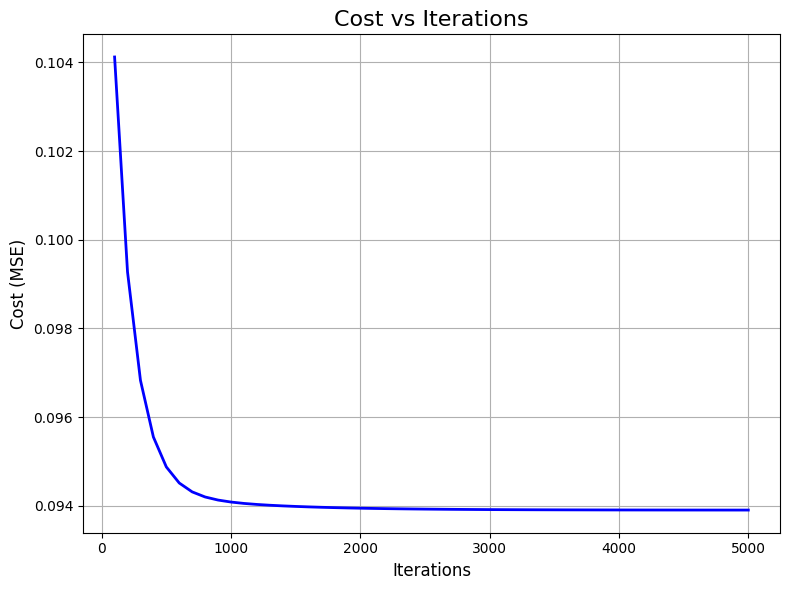

In [423]:
plt.figure(figsize=(8,6))
plt.plot(epochs, costs, color='blue', linewidth=2)  # Use epochs, not full range
plt.title('Cost vs Iterations', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Cost (MSE)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()